# plot boundary preserving property

In [77]:
# import modules
import os
import json

import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [78]:
dataset = "cifar10"
start = 40
end = 240
p = 40

In [79]:
data = np.array([])
# load data from evaluation.json
content_path = "E:\\DVI_exp_data\\resnet18_{}".format(dataset)
for epoch in range(start, end, p):
    eval_path = os.path.join(content_path, "Model", "Epoch_{}".format(epoch), "evaluation.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval["bound_train_15"], 3)
    nn_test = round(eval["bound_test_15"], 3)

    if len(data)==0:
        data = np.array([[dataset, "DVI", "Train", "{}".format(str(epoch//p)), nn_train]])
    else:
        data = np.concatenate((data, np.array([[dataset, "DVI", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "DVI", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)

In [80]:
content_path = "E:\\xianglin\\git_space\\umap_exp\\results"
# pca
curr_path = os.path.join(content_path, "pca")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[11], 3)
    nn_test = round(eval[14], 3)

    data = np.concatenate((data, np.array([[dataset, "PCA", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "PCA", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)
# tsne
curr_path = os.path.join(content_path, "tsne")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[4], 3)

    data = np.concatenate((data, np.array([[dataset, "TSNE", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)

# umap
curr_path = os.path.join(content_path, "umap")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[11], 3)
    nn_test = round(eval[14], 3)

    data = np.concatenate((data, np.array([[dataset, "UMAP", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "UMAP", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)

In [81]:
col = np.array(["dataset", "method", "type", "period", "eval"])
df = pd.DataFrame(data, columns=col)

In [82]:
df

,dataset,method,type,period,eval
0,cifar10,DVI,Train,1,5.657
1,cifar10,DVI,Test,1,5.655
2,cifar10,DVI,Train,2,5.566
3,cifar10,DVI,Test,2,5.559
4,cifar10,DVI,Train,3,6.053
5,cifar10,DVI,Test,3,6.028
6,cifar10,DVI,Train,4,4.934
7,cifar10,DVI,Test,4,4.913
8,cifar10,DVI,Train,5,4.194
9,cifar10,DVI,Test,5,4.168


In [83]:
df[["period"]] = df[["period"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

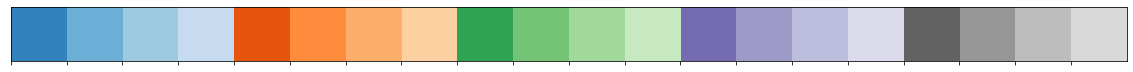

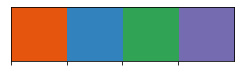

In [84]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "DVI": pal20c[4],
    "UMAP": pal20c[0],
    "TSNE": pal20c[8],
    "PCA": pal20c[12],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

In [85]:
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

# hue_list = ["TSNE", "parametric-tsne", "umap-learn",  'direct', "network", "autoencoder", 'vae', 'ae_only', "PCA"]
hue_list = ["DVI", "UMAP", "TSNE", "PCA"]

Text(0.5, 0.98, 'cifar10')

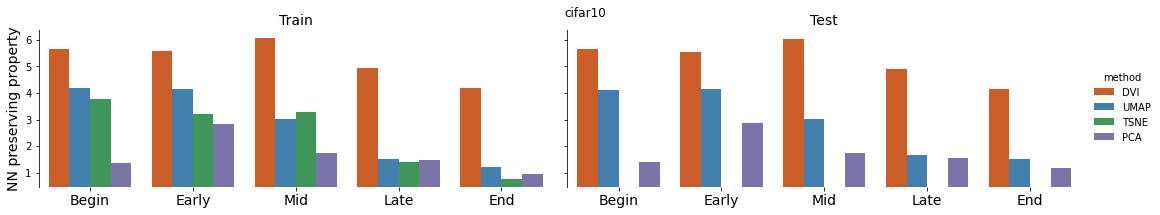

In [86]:
fg = sns.catplot(
    x="period",
    y="eval",
    hue="method",
    hue_order=hue_list,
    # order = [1, 2, 3, 4, 5],
    # row="method",
    col="type",
    ci=0.001,
    height=3, #2.65,
    aspect=2.5,#3,
    data=df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=True
)

axs = fg.axes[0]
maxlimit = df["eval"].max()
minlimit = df["eval"].min()
axs[0].set_ylim(minlimit-0.3, maxlimit+0.3)
axs[0].set_title("Train")
axs[1].set_title("Test")

(fg.despine(bottom=True)
 .set_xticklabels(['Begin', 'Early', 'Mid', 'Late', 'End'])
 .set_axis_labels("", "NN preserving property")
 )
fg.fig.suptitle(dataset)

In [87]:
fg.savefig(
    "boundary_{}.png".format(dataset),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)